In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.ticker as mticker


## CARGA

In [2]:
df=pd.read_csv("dataset_comunidades_senasoft.csv")
df.head()

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1


In [3]:
df.columns


Index(['ID', 'Nombre', 'Edad', 'Género', 'Ciudad', 'Comentario',
       'Categoría del problema', 'Nivel de urgencia', 'Fecha del reporte',
       'Acceso a internet', 'Atención previa del gobierno', 'Zona rural'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10000 non-null  int64  
 1   Nombre                        10000 non-null  object 
 2   Edad                          9325 non-null   float64
 3   Género                        9539 non-null   object 
 4   Ciudad                        9864 non-null   object 
 5   Comentario                    9362 non-null   object 
 6   Categoría del problema        10000 non-null  object 
 7   Nivel de urgencia             10000 non-null  object 
 8   Fecha del reporte             10000 non-null  object 
 9   Acceso a internet             10000 non-null  int64  
 10  Atención previa del gobierno  10000 non-null  int64  
 11  Zona rural                    10000 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 937.6+ KB


In [5]:
df.describe()

,ID,Edad,Acceso a internet,Atención previa del gobierno,Zona rural
count,10000.00000,9325.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,47.482895,0.510200,0.494800,0.492800
std,2886.89568,19.142348,0.499921,0.499998,0.499973
min,1.00000,15.000000,0.000000,0.000000,0.000000
25%,2500.75000,31.000000,0.000000,0.000000,0.000000
50%,5000.50000,48.000000,1.000000,0.000000,0.000000
75%,7500.25000,64.000000,1.000000,1.000000,1.000000
max,10000.00000,80.000000,1.000000,1.000000,1.000000


In [6]:
df["Categoría del problema"].unique()

array(['Salud', 'Medio Ambiente', 'Seguridad', 'Educación'], dtype=object)

In [7]:
df["Ciudad"].unique()

array(['Manizales', 'Santa Marta', 'Medellín', 'Bogotá', 'Cartagena',
       'Cali', 'Barranquilla', 'Pereira', 'Cúcuta', 'Bucaramanga', nan],
      dtype=object)

In [8]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.', nan,
       'queremos más presencia policial.'], dtype=object)

In [9]:
df = df.dropna(subset=['Ciudad'])
df.isnull().sum()

ID                                0
Nombre                            0
Edad                            672
Género                          453
Ciudad                            0
Comentario                      628
Categoría del problema            0
Nivel de urgencia                 0
Fecha del reporte                 0
Acceso a internet                 0
Atención previa del gobierno      0
Zona rural                        0
dtype: int64

In [10]:
df.head()

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1


In [11]:
df["Nombre"].unique()

array(['Jorge', 'Camilo', 'Pedro', 'Ana', 'María', 'Carlos', 'Laura',
       'Sofía', 'Valentina', 'Juan'], dtype=object)

In [12]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.', nan,
       'queremos más presencia policial.'], dtype=object)

## TRANSFORMACION

In [13]:
# Diccionario inverso: comentario → categoría correcta
categoria_por_comentario = {
    "faltan médicos en el centro de salud.": "Salud",
    "falta agua potable en varias casas.": "Salud",
    "no hay suficientes escuelas públicas.": "Educación",
    "no tenemos centros culturales ni bibliotecas.": "Educación",
    "necesitamos más acceso a internet en la zona.": "Educación",
    "las calles están muy oscuras y peligrosas.": "Seguridad",
    "queremos más presencia policial.": "Seguridad",
    "las basuras no se recogen a tiempo.": "Medio Ambiente",
    "la contaminación del río está aumentando.": "Medio Ambiente",
    "hay problemas con la recolección de basura.": "Medio Ambiente"
}

# Función de reasignación de categoría según comentario
def asignar_categoria(comentario):
    return categoria_por_comentario.get(comentario, np.nan)

# Aplicar la reasignación con .loc
df.loc[:, "Categoría del problema"] = df["Comentario"].apply(asignar_categoria)

# Convertir a string nativo (por claridad)
df.loc[:, "Categoría del problema"] = df["Categoría del problema"].astype("string")


In [14]:
# Eliminar filas donde no se pudo asignar categoría
df = df.dropna(subset=["Categoría del problema"])

In [15]:
# Eliminar columnas innecesarias
df = df.drop(columns=['Edad', 'ID','Género'], errors='ignore')
# Convertir 'Fecha del reporte' a formato datetime
df['Fecha del reporte'] = pd.to_datetime(df['Fecha del reporte'], errors='coerce')
df.head()

,Nombre,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,Jorge,Manizales,las calles están muy oscuras y peligrosas.,Seguridad,Urgente,2023-08-11,0,1,0
1,Camilo,Santa Marta,no tenemos centros culturales ni bibliotecas.,Educación,No urgente,2023-04-12,1,1,1
2,Pedro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,Ana,Bogotá,la contaminación del río está aumentando.,Medio Ambiente,No urgente,2023-06-04,0,1,1
4,Jorge,Manizales,no hay suficientes escuelas públicas.,Educación,Urgente,2024-07-10,1,0,1


In [16]:
# Eliminar filas donde no se pudo asignar categoría
df = df.dropna(subset=["Categoría del problema"])
df.drop('Nombre', axis=1, inplace=True)

In [17]:
# Aplicar reglas directamente sobre la columna existente
df.loc[
    (df['Acceso a internet'] == 0) & (df['Atención previa del gobierno'] == 0) & (df['Zona rural'] == 1),
    'Nivel de urgencia'
] = 'Urgente'

df.loc[
    (df['Acceso a internet'] == 1) & (df['Atención previa del gobierno'] == 1),
    'Nivel de urgencia'
] = 'No urgente'

df.loc[
    (df['Zona rural'] == 1) & (df['Acceso a internet'] == 0),
    'Nivel de urgencia'
] = 'Urgente'

df.loc[
    (df['Zona rural'] == 0) & (df['Atención previa del gobierno'] == 0),
    'Nivel de urgencia'
] = 'Urgente'


In [18]:
# Mostrar el DataFrame resultante
df.to_csv("dataset_modificado.csv", index=False, encoding='utf-8-sig')

## CARGA

 Modelo 

In [19]:
# Convertir la columna de urgencia a binaria
df["Urgencia_binaria"] = df["Nivel de urgencia"].map({"Urgente": 1, "No urgente": 0})

# Seleccionar variables independientes
X = df[["Zona rural", "Atención previa del gobierno", "Acceso a internet"]]
y = df["Urgencia_binaria"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Evaluar
y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 569  125]
 [ 108 1046]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       694
           1       0.89      0.91      0.90      1154

    accuracy                           0.87      1848
   macro avg       0.87      0.86      0.86      1848
weighted avg       0.87      0.87      0.87      1848



PROBAR CON NUEVO COMENTARIO


In [21]:
# Ejemplo de nuevo caso
nuevo = pd.DataFrame({
    "Zona rural": [1],
    "Atención previa del gobierno": [0],
    "Acceso a internet": [1]
})

# Predecir con el modelo entrenado
prediccion = modelo.predict(nuevo)

# Mostrar resultado
print(f"🔮 Predicción del modelo: {'Urgente' if prediccion[0] == 1 else 'No urgente'}")


🔮 Predicción del modelo: Urgente


In [22]:


# Crear manualmente todas las combinaciones posibles
nuevos_casos = pd.DataFrame([
    {"Zona rural": 0, "Atención previa del gobierno": 0, "Acceso a internet": 0},
    {"Zona rural": 0, "Atención previa del gobierno": 0, "Acceso a internet": 1},
    {"Zona rural": 0, "Atención previa del gobierno": 1, "Acceso a internet": 0},
    {"Zona rural": 0, "Atención previa del gobierno": 1, "Acceso a internet": 1},
    {"Zona rural": 1, "Atención previa del gobierno": 0, "Acceso a internet": 0},
    {"Zona rural": 1, "Atención previa del gobierno": 0, "Acceso a internet": 1},
    {"Zona rural": 1, "Atención previa del gobierno": 1, "Acceso a internet": 0},
    {"Zona rural": 1, "Atención previa del gobierno": 1, "Acceso a internet": 1}
])

# Predecir con el modelo entrenado
predicciones = modelo.predict(nuevos_casos)

# Añadir resultados al DataFrame
nuevos_casos["Predicción del modelo"] = ["Urgente" if p == 1 else "No urgente" for p in predicciones]

# Mostrar resultados
print(nuevos_casos)


   Zona rural  Atención previa del gobierno  Acceso a internet  \
0           0                             0                  0   
1           0                             0                  1   
2           0                             1                  0   
3           0                             1                  1   
4           1                             0                  0   
5           1                             0                  1   
6           1                             1                  0   
7           1                             1                  1   

  Predicción del modelo  
0               Urgente  
1               Urgente  
2            No urgente  
3            No urgente  
4               Urgente  
5               Urgente  
6               Urgente  
7            No urgente  


## Gaficas modelo


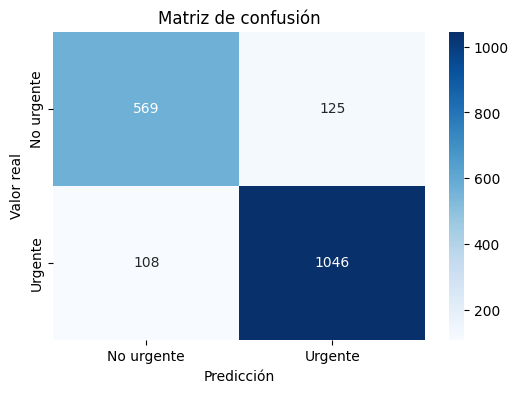

In [23]:
#  Matriz de confusión
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No urgente", "Urgente"], yticklabels=["No urgente", "Urgente"])
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

C:\Users\SENADMIN\AppData\Local\Temp\ipykernel_2196\3690576018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias * 100, y=nombres_vars, palette='viridis')  # Convertir a porcentaje


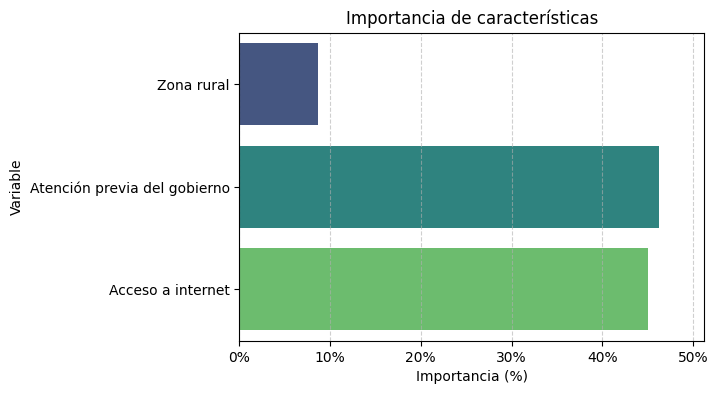

In [24]:
# Importancia de características
importancias = modelo.feature_importances_
nombres_vars = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importancias * 100, y=nombres_vars, palette='viridis')  # Convertir a porcentaje
plt.title("Importancia de características")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.xlim(0, max(importancias * 100) + 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar solo enteros en el eje X
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x)}%"))

In [25]:
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test,probas )
auc = roc_auc_score(y_test,probas)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC del modelo")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)

# Formatear ejes sin decimales
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], ["0%", "25%", "50%", "75%", "100%"])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], ["0%", "25%", "50%", "75%", "100%"])

NameError: name 'probas' is not defined